**CSCN8010 - Lab 3**

**Univariate Linear Regression Model**

*The overall goal is to build a predictive model for 'median_house_value' based on 'median_income' and evaluate its performance using metrics like MSE and MAE on both the training and testing sets. This type of analysis is common in machine learning and regression tasks, where the goal is to understand and predict the relationship between variables in a dataset.*



[Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data) 

**Exploratory Data Analysis (EDA)**

In [62]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [63]:
housing_data = pd.read_csv
df = pd.read_csv("Data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Explore statistics (e.g. using Pandas `describe` function)**

In [64]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Describing the 4 variables and Review the range of the data for each variable, and other issues you notice**

In [65]:
selected_columns = ['population', 'households', 'median_income', 'median_house_value']
subset_df = df[selected_columns]

# Display the descriptive statistics
description = subset_df.describe()

# Check for missing values
missing_values = subset_df.isnull().sum()

ranges = subset_df.max() - subset_df.min()
print("Descriptive Statistics:")
print(description)

print("\nMissing Values:")
print(missing_values)
print("Range for Each Variable:")
print(ranges)

Descriptive Statistics:
         population    households  median_income  median_house_value
count  20640.000000  20640.000000   20640.000000        20640.000000
mean    1425.476744    499.539680       3.870671       206855.816909
std     1132.462122    382.329753       1.899822       115395.615874
min        3.000000      1.000000       0.499900        14999.000000
25%      787.000000    280.000000       2.563400       119600.000000
50%     1166.000000    409.000000       3.534800       179700.000000
75%     1725.000000    605.000000       4.743250       264725.000000
max    35682.000000   6082.000000      15.000100       500001.000000

Missing Values:
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Range for Each Variable:
population             35679.0000
households              6081.0000
median_income             14.5002
median_house_value    485002.0000
dtype: float64


**Seaborn scatter plots of median house value vs. median income, population and number of households**

**Median Income vs. Median House Value**

<Axes: xlabel='median_income', ylabel='median_house_value'>

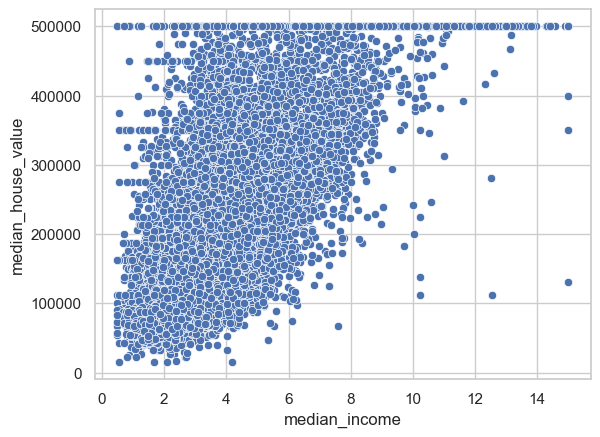

In [66]:
sns.scatterplot(x="median_income", y="median_house_value", data=df)

*The graph shows the link between median income and median house value in different areas. High median incomes usually indicate high median house values as well, but there's a lot of variation. Some areas have high house values despite low median incomes, and vice versa. Most areas have median income between 2 and 6, and median house value between 100000 and 500000.*


**Median house value vs Population**

<Axes: xlabel='population', ylabel='median_house_value'>

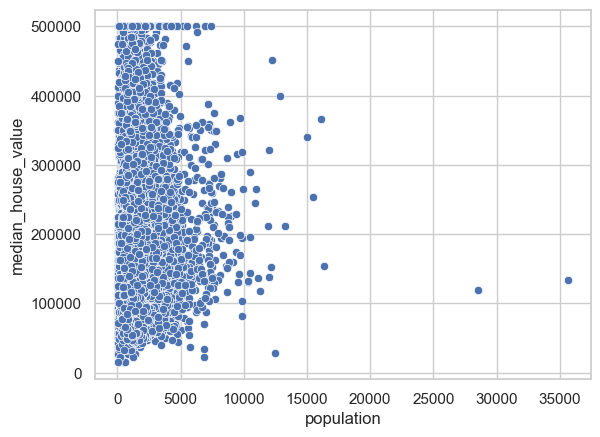

In [67]:
sns.scatterplot(x="population", y="median_house_value", data=df)

**Median house value vs Number of Households**

<Axes: xlabel='households', ylabel='median_house_value'>

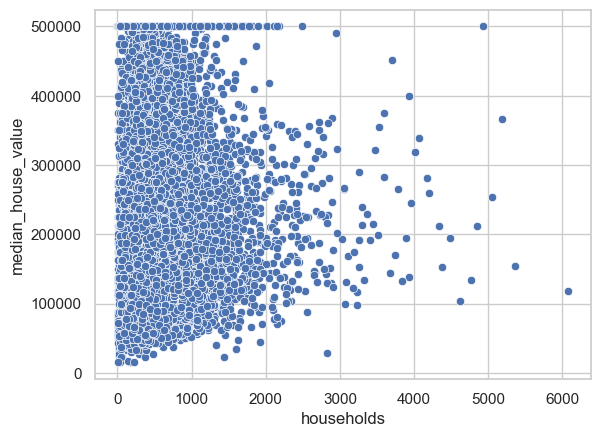

In [68]:
sns.scatterplot(x="households", y="median_house_value", data=df)

*The graph indicates that there is no significant correlation between the number of households and median house value in different areas. Most areas have fewer than 2000 households and median house values between 0 and 300,000.*

**Linear Regression Object**

In [69]:
model = linear_model.LinearRegression()

In [70]:
model.fit(X=df[["median_income"]], y=df[["median_house_value"]])

LinearRegression()

In [71]:
model.fit(X=df[["population"]], y=df[["median_house_value"]])

LinearRegression()

In [72]:
model.fit(X=df[["households"]], y=df[["median_house_value"]])

LinearRegression()

**Summarizing the table for Intercept and Slope**

| Independent Variable | Slope (Coefficient) | Intercept |
|-----------------------|----------------------|-----------|
| Median Income         |  [slope_value]       | [intercept_value] |
| Population            |  [slope_value]       | [intercept_value] |
| Number of Households  |  [slope_value]       | [intercept_value] |


In [73]:
from sklearn.linear_model import LinearRegression
model_income = LinearRegression()
model_population = LinearRegression()
model_households = LinearRegression()
model_income.fit(df[['median_income']], df['median_house_value'])
model_population.fit(df[['population']], df['median_house_value'])
model_households.fit(df[['households']], df['median_house_value'])
slope_income = model_income.coef_[0]
intercept_income = model_income.intercept_
slope_population = model_population.coef_[0]
intercept_population = model_population.intercept_
slope_households = model_households.coef_[0]
intercept_households = model_households.intercept_
print("| Independent Variable | Slope (Coefficient) | Intercept |")
print("|-----------------------|----------------------|-----------|")
print(f"| Median Income         | {slope_income}       | {intercept_income} |")
print(f"| Population            | {slope_population}       | {intercept_population} |")
print(f"| Number of Households  | {slope_households}       | {intercept_households} |")


| Independent Variable | Slope (Coefficient) | Intercept |
|-----------------------|----------------------|-----------|
| Median Income         | 41793.849201896286       | 45085.5767032679 |
| Population            | -2.511752774615085       | 210436.26207627333 |
| Number of Households  | 19.872775155643875       | 196928.57716233088 |


***resulting line on top of the scatter data***

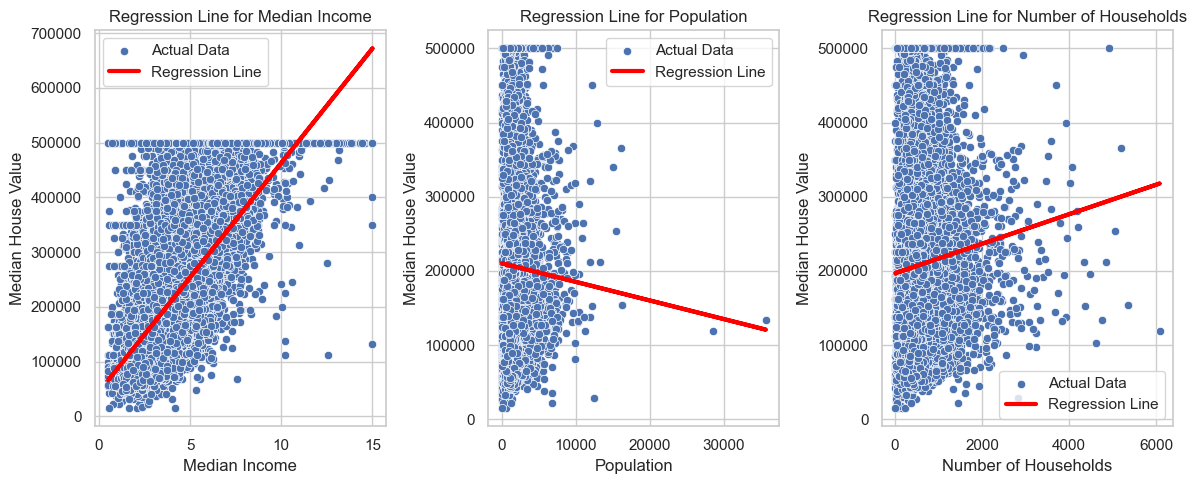

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
predictions_income = model_income.predict(df[['median_income']])
predictions_population = model_population.predict(df[['population']])
predictions_households = model_households.predict(df[['households']])
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=df, label='Actual Data')
plt.plot(df['median_income'], predictions_income, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Regression Line for Median Income')
plt.legend()
plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=df, label='Actual Data')
plt.plot(df['population'], predictions_population, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.title('Regression Line for Population')
plt.legend()
plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=df, label='Actual Data')
plt.plot(df['households'], predictions_households, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.title('Regression Line for Number of Households')
plt.legend()
plt.tight_layout()
plt.show()


**Conclusion**
***The regression lines' goodness-of-fit varies by variables in the image. The median income vs median house value plot shows the best fit with a strong positive correlation and low variance. The population vs median house value plot has the worst fit with a weak correlation and high variance. The number of households vs median house value plot displays a moderate fit with a positive correlation, but significant variance at higher household numbers.***

**Summarizing the table for Mean Squared Error - the loss**


| Independent Variable | Mean Squared Error (MSE) |
|-----------------------|--------------------------|
| Median Income         | [MSE value]              |
| Population            | [MSE value]              |
| Number of Households  | [MSE value]              |


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_income = LinearRegression()
model_population = LinearRegression()
model_households = LinearRegression()
model_income.fit(df[['median_income']], df['median_house_value'])
model_population.fit(df[['population']], df['median_house_value'])
model_households.fit(df[['households']], df['median_house_value'])
predictions_income = model_income.predict(df[['median_income']])
predictions_population = model_population.predict(df[['population']])
predictions_households = model_households.predict(df[['households']])
mse_income = mean_squared_error(df['median_house_value'], predictions_income)
mse_population = mean_squared_error(df['median_house_value'], predictions_population)
mse_households = mean_squared_error(df['median_house_value'], predictions_households)
print("| Independent Variable | Mean Squared Error (MSE) |")
print("|-----------------------|--------------------------|")
print(f"| Median Income         | {mse_income}             |")
print(f"| Population            | {mse_population}         |")
print(f"| Number of Households  | {mse_households}         |")


| Independent Variable | Mean Squared Error (MSE) |
|-----------------------|--------------------------|
| Median Income         | 7011311502.929527             |
| Population            | 13307412412.389355         |
| Number of Households  | 13257776904.728533         |


***resulting line on top of the scatter data***

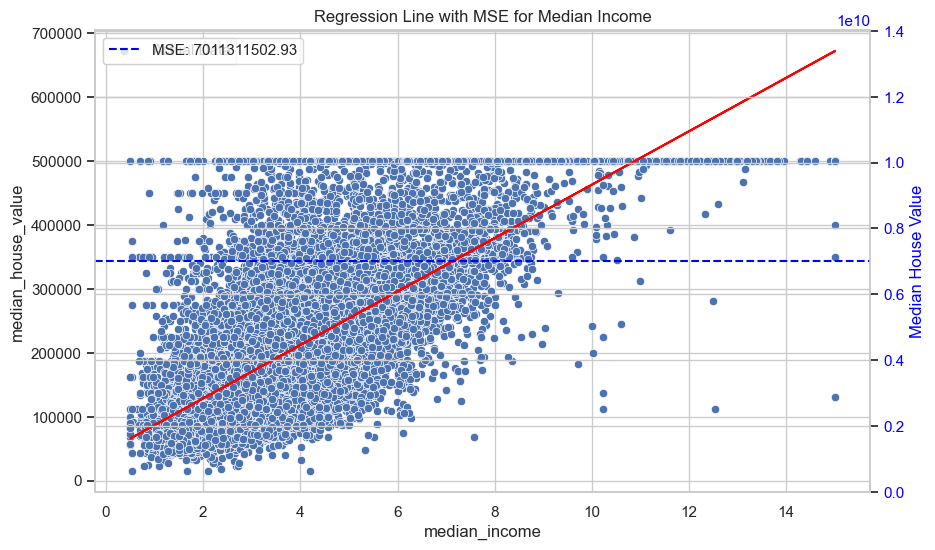

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_income = LinearRegression()
model_income.fit(df[['median_income']], df['median_house_value'])
predictions_income = model_income.predict(df[['median_income']])
mse_income = mean_squared_error(df['median_house_value'], predictions_income)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, label='Actual Data')
plt.plot(df['median_income'], predictions_income, color='red', label='Regression Line')
ax2 = plt.gca().twinx()
ax2.set_ylim(0, mse_income * 2)
ax2.set_ylabel('Mean Squared Error (MSE)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.axhline(y=mse_income, color='blue', linestyle='--', label=f'MSE: {mse_income:.2f}')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Regression Line with MSE for Median Income')
plt.legend(loc='upper left')
plt.show()


**Conclusion**

***I can conclude that the goodness-of-fit for the regression line is not very good, as the mean squared error is high and the data points are scattered. The graph shows a positive correlation between median income and median house value, but there is a lot of variation and outliers in the data***

**Summarizing the table for Mean Absolute Error**



| Independent Variable | Mean Absolute Error (MAE) |
|-----------------------|---------------------------|
| Median Income         | [MAE value]               |
| Population            | [MAE value]               |
| Number of Households  | [MAE value]               |


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model_income = LinearRegression()
model_population = LinearRegression()
model_households = LinearRegression()
model_income.fit(df[['median_income']], df['median_house_value'])
model_population.fit(df[['population']], df['median_house_value'])
model_households.fit(df[['households']], df['median_house_value'])
predictions_income = model_income.predict(df[['median_income']])
predictions_population = model_population.predict(df[['population']])
predictions_households = model_households.predict(df[['households']])
mae_income = mean_absolute_error(df['median_house_value'], predictions_income)
mae_population = mean_absolute_error(df['median_house_value'], predictions_population)
mae_households = mean_absolute_error(df['median_house_value'], predictions_households)
print("| Independent Variable | Mean Absolute Error (MAE) |")
print("|-----------------------|---------------------------|")
print(f"| Median Income         | {mae_income}              |")
print(f"| Population            | {mae_population}          |")
print(f"| Number of Households  | {mae_households}          |")


| Independent Variable | Mean Absolute Error (MAE) |
|-----------------------|---------------------------|
| Median Income         | 62625.9337911434              |
| Population            | 91153.82009473183          |
| Number of Households  | 90802.74324318448          |


***resulting line on top of the scatter data***

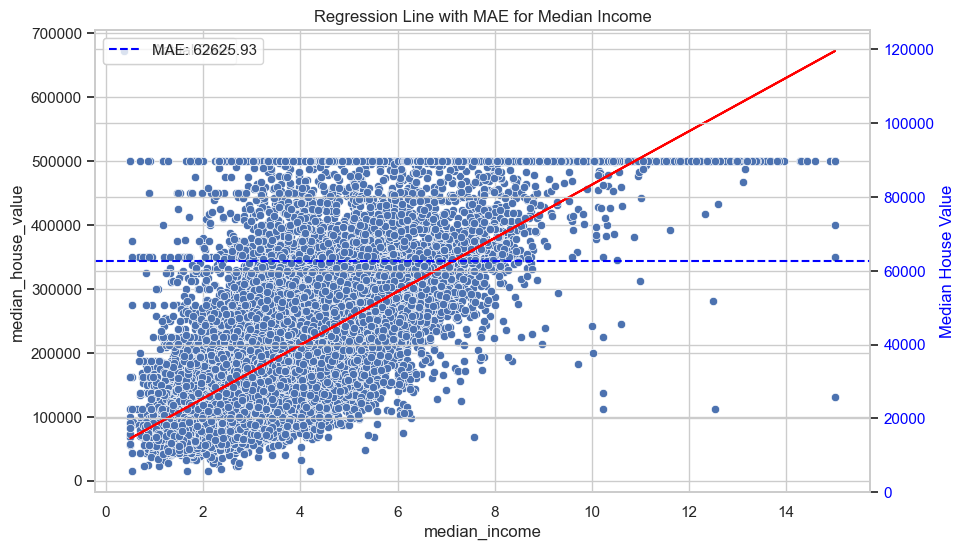

In [78]:
model_income = LinearRegression()
model_income.fit(df[['median_income']], df['median_house_value'])
predictions_income = model_income.predict(df[['median_income']])
mae_income = mean_absolute_error(df['median_house_value'], predictions_income)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, label='Actual Data')
plt.plot(df['median_income'], predictions_income, color='red', label='Regression Line')
ax2 = plt.gca().twinx()
ax2.set_ylim(0, mae_income * 2)  
ax2.set_ylabel('Mean Absolute Error (MAE)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.axhline(y=mae_income, color='blue', linestyle='--', label=f'MAE: {mae_income:.2f}')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Regression Line with MAE for Median Income')
plt.legend(loc='upper left')
plt.show()


**Conclusion**

***The correlation between median income and median house value is positive but with significant variation and outliers. The regression line's goodness-of-fit is poor, and there is a high mean absolute error with scattered data points. Median income is a relevant predictor of median house value, but not always accurate due to other factors impacting house value. Few areas have extremely high or low median income, indicating comparable income levels.***